<a href="https://colab.research.google.com/github/17092003vamsi/HUNTERs/blob/main/21%20ecg%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Total samples: 909, Classes: 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 804ms/step - accuracy: 0.2958 - loss: 2.9982 - val_accuracy: 0.2466 - val_loss: 1.3837
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 806ms/step - accuracy: 0.2659 - loss: 1.3820 - val_accuracy: 0.3973 - val_loss: 1.3395
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 816ms/step - accuracy: 0.3163 - loss: 1.3819 - val_accuracy: 0.2466 - val_loss: 1.3750
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 784ms/step - accuracy: 0.2537 - loss: 1.3794 - val_accuracy: 0.4658 - val_loss: 1.3704
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 775ms/step - accuracy: 0.3415 - loss: 1.3688 - val_accuracy: 0.3973 - val_loss: 1.3412
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 774ms/step - accuracy: 0.3515 - loss: 1.3436 - val_accuracy: 0.6301 - val_loss: 1.3061
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 784ms/step - accuracy: 0.5039 - loss: 1.2761 - val_accuracy: 0.6164 - val_loss: 1.1581
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - accuracy: 0.5155 - loss: 1.1634 - val_accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step

📊 ✅ Combined Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      1.00      1.00        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.94      0.85      0.89        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.92      0.76      0.83        45
                          Normal Person ECG Images (284x12=3408)       0.81      0.96      0.88        57

                                                        accuracy                           0.90       182
                                                       macro avg       0.92      0.89      0.90       182
                                                    weighted avg       0.91      0.90      0.90       182



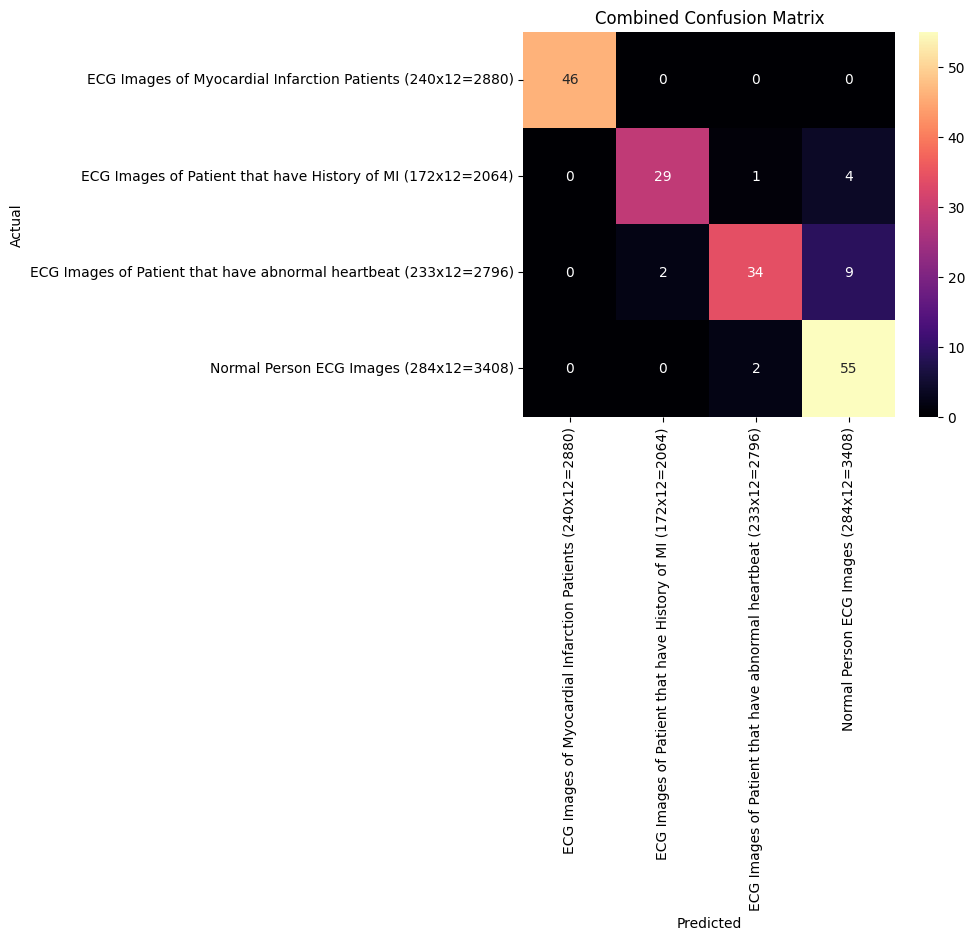

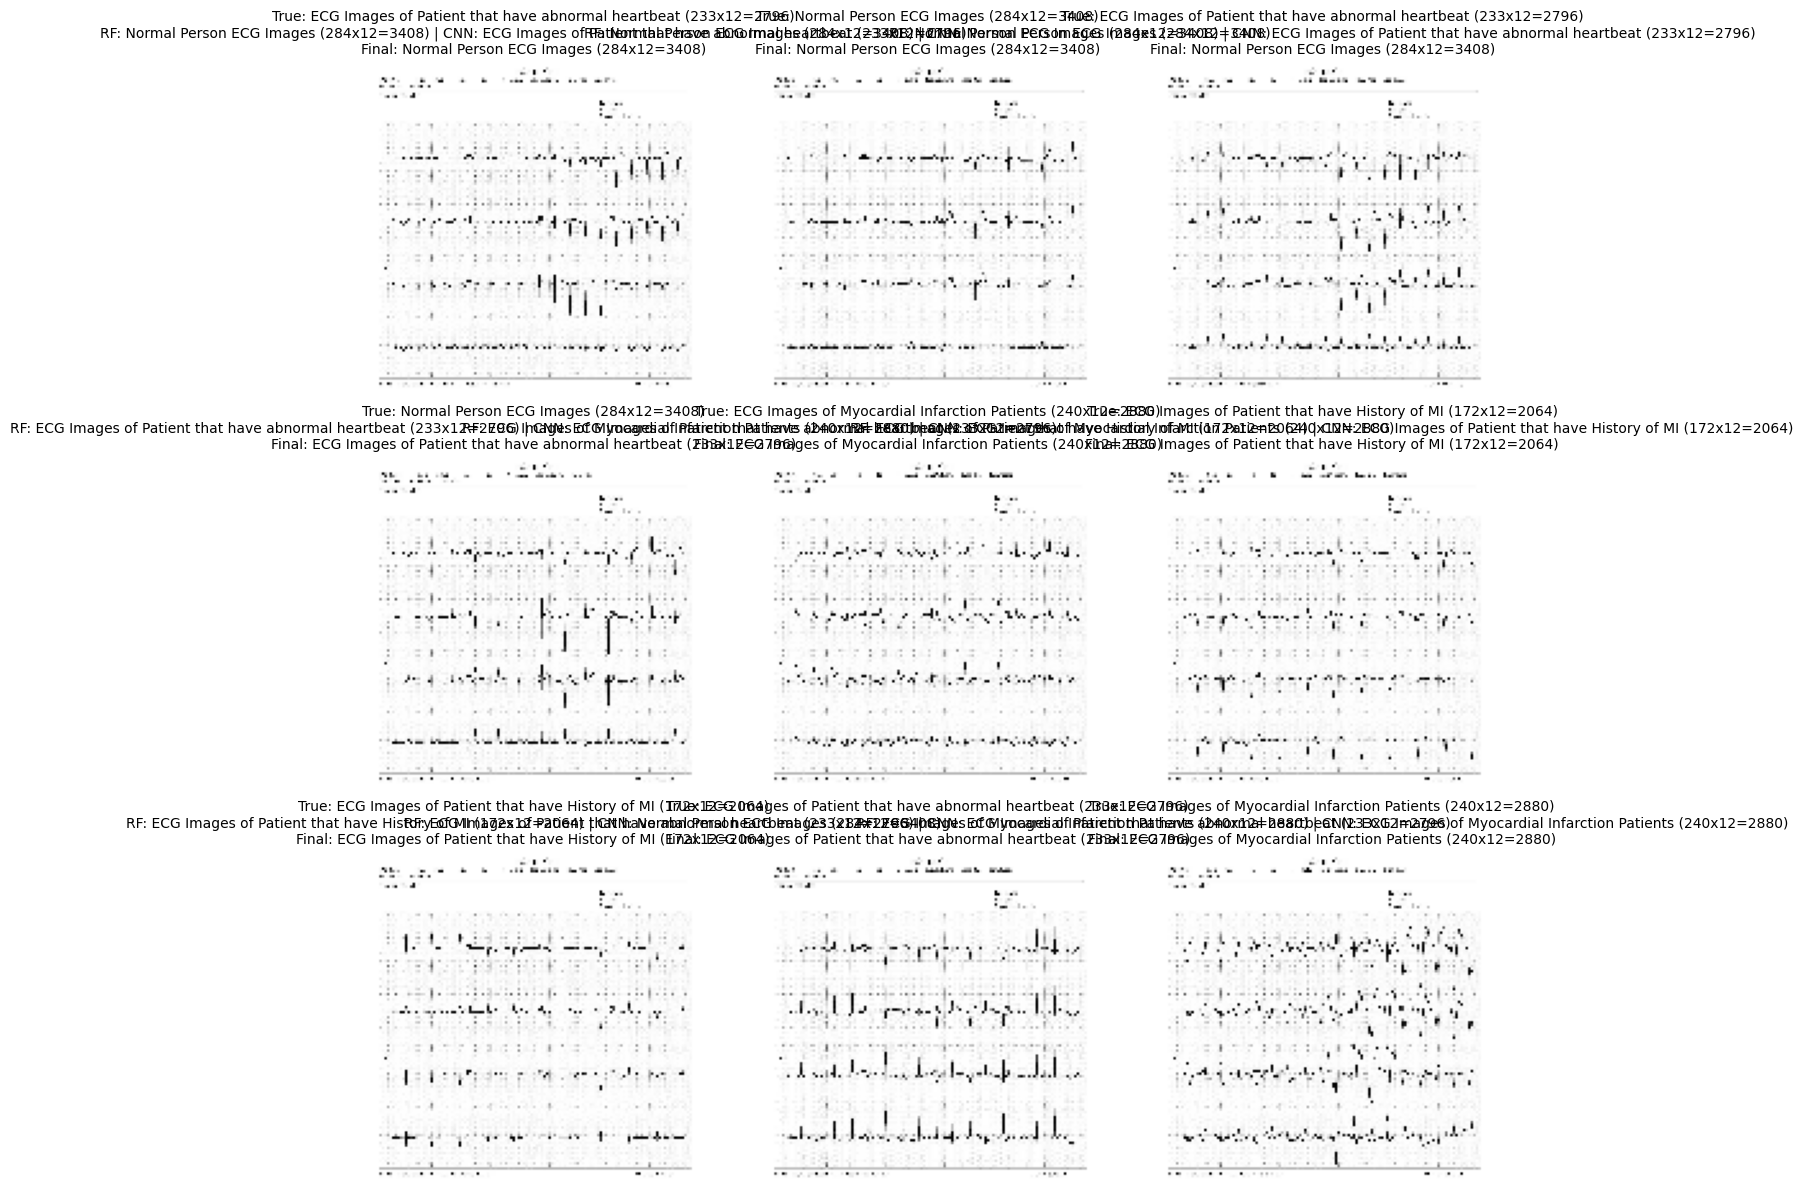

✅ Models saved successfully.


In [5]:
# ✅ Install Required Libraries
!pip install -q scikit-image opencv-python tensorflow

# ✅ Imports
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Parameters
IMG_SIZE = (128, 128)
DATASET_PATH = "/content/drive/MyDrive/dataset of ecg project"
CATEGORIES = sorted(os.listdir(DATASET_PATH))
label_map = {cat: idx for idx, cat in enumerate(CATEGORIES)}
inv_label_map = {v: k for k, v in label_map.items()}

# ✅ Data Preparation
X_hog, y, images = [], [], []
for label in CATEGORIES:
    folder = os.path.join(DATASET_PATH, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)
            X_hog.append(features)
            y.append(label_map[label])
            images.append(img)

X_hog = np.array(X_hog)
images = np.array(images)
y = np.array(y)
print(f"✅ Total samples: {len(X_hog)}, Classes: {len(CATEGORIES)}")

# ✅ Train/Test Split
X_train_hog, X_test_hog, y_train, y_test, img_train, img_test = train_test_split(
    X_hog, y, images, test_size=0.2, stratify=y, random_state=42)

# ✅ RF Model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_hog, y_train)

# ✅ CNN Preparation
images_norm = np.expand_dims(images, axis=-1) / 255.0
y_cat = to_categorical(y, num_classes=len(CATEGORIES))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    images_norm, y_cat, test_size=0.2, stratify=y, random_state=42)

# ✅ CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# ✅ Combined Prediction (Ensemble Logic)
y_pred_rf = rf_model.predict(X_test_hog)
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

final_predictions = []
for i in range(len(y_pred_cnn)):
    confidence = np.max(y_pred_cnn_prob[i])
    final_pred = y_pred_cnn[i] if confidence > 0.8 else y_pred_rf[i]
    final_predictions.append(final_pred)

# ✅ Classification Report (Final)
print("\n📊 ✅ Combined Classification Report:")
print(classification_report(y_test, final_predictions, target_names=CATEGORIES))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Combined Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ 3×3 Prediction Grid with Clarity
plt.figure(figsize=(12, 12))
for i in range(9):
    idx = i
    img = img_test[idx]
    true_lbl = inv_label_map[y_test[idx]]
    rf_lbl = inv_label_map[y_pred_rf[idx]]
    cnn_lbl = inv_label_map[y_pred_cnn[idx]]
    final_lbl = inv_label_map[final_predictions[idx]]

    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_lbl}\nRF: {rf_lbl} | CNN: {cnn_lbl}\nFinal: {final_lbl}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# ✅ Save Models
joblib.dump(rf_model, '/content/drive/MyDrive/ecg_rf_model_combined.pkl')
cnn_model.save('/content/drive/MyDrive/ecg_cnn_model_combined.h5')
print("✅ Models saved successfully.")
